**PJM Hourly Energy Consumption Data**

PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

**Ideas of what you could do with this dataset:**<br>
1. Split the last year into a test set- can you build a model to predict energy consumption?
2. Find trends in energy consumption around hours of the day, holidays, or long term trends?
3. Understand how daily trends change depending of the time of year. Summer trends are very different than winter trends.

Reference: https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from matplotlib import figure

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

**Note:** Need to practice compiling all excel spreadsheets into one

In [2]:
# Load dataset
df = pd.read_csv('./archive/pjm_hourly_est.csv')
df.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0


In [3]:
# Check Datatype for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  178262 non-null  object 
 1   AEP       121273 non-null  float64
 2   COMED     66497 non-null   float64
 3   DAYTON    121275 non-null  float64
 4   DEOK      57739 non-null   float64
 5   DOM       116189 non-null  float64
 6   DUQ       119068 non-null  float64
 7   EKPC      45334 non-null   float64
 8   FE        62874 non-null   float64
 9   NI        58450 non-null   float64
 10  PJME      145366 non-null  float64
 11  PJMW      143206 non-null  float64
 12  PJM_Load  32896 non-null   float64
dtypes: float64(12), object(1)
memory usage: 17.7+ MB


**Columns**
1. AEP: American Electric Power
2.  COMED: Commonwealth Edison
3.  DAYTON: The Dayton Power and Light Company
4.  DEOK: Duke Energy Ohio/Kentucky
5.  DOM: Dominion Virginia Power
6.  DUQ: Duquesne Light Co.
7.  EKPC: East Kentucky Power Cooperative
8.  FE: FirstEnergy
9.  NI: Northern Illinois Hub
10. PJME: PJM East Region
11. PJMW: PJM West Region
12. PJM Load Combined

In [4]:
# Set Datetime as Index
df['Datetime'] = pd.to_datetime(df['Datetime'])
#df = df.set_index('Datetime')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  178262 non-null  datetime64[ns]
 1   AEP       121273 non-null  float64       
 2   COMED     66497 non-null   float64       
 3   DAYTON    121275 non-null  float64       
 4   DEOK      57739 non-null   float64       
 5   DOM       116189 non-null  float64       
 6   DUQ       119068 non-null  float64       
 7   EKPC      45334 non-null   float64       
 8   FE        62874 non-null   float64       
 9   NI        58450 non-null   float64       
 10  PJME      145366 non-null  float64       
 11  PJMW      143206 non-null  float64       
 12  PJM_Load  32896 non-null   float64       
dtypes: datetime64[ns](1), float64(12)
memory usage: 17.7 MB


In [5]:
# Create four new columns
df['Week'] = df['Datetime'].dt.strftime('%Y-W%V')
df['Month'] = df['Datetime'].dt.strftime('%Y-%m')
df['Quarter'] = df['Datetime'].dt.to_period('Q').dt.strftime('%Y-Q%q')
df['Year'] = df['Datetime'].dt.strftime('%Y')
df.head()

,Datetime,AEP,COMED,DAYTON,DEOK,DOM,DUQ,EKPC,FE,NI,PJME,PJMW,PJM_Load,Week,Month,Quarter,Year
0,1998-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29309.0,1998-W53,1998-12,1998-Q4,1998
1,1998-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28236.0,1998-W53,1998-12,1998-Q4,1998
2,1998-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27692.0,1998-W53,1998-12,1998-Q4,1998
3,1998-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27596.0,1998-W53,1998-12,1998-Q4,1998
4,1998-12-31 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27888.0,1998-W53,1998-12,1998-Q4,1998


## Visualization

In [6]:
# # Test
# sns.lineplot(x = 'Datetime', y = 'AEP', data = df, label = 'AEP Column')

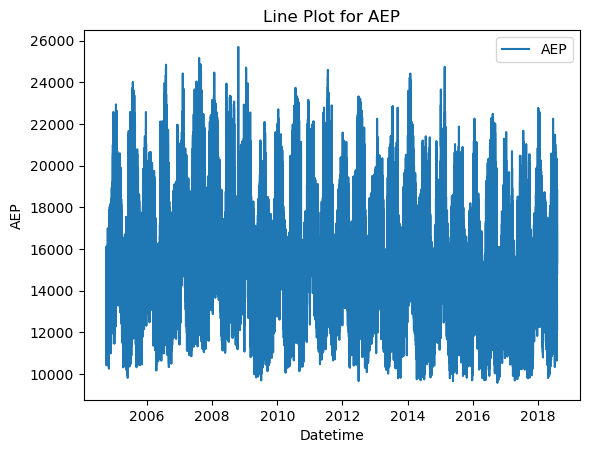

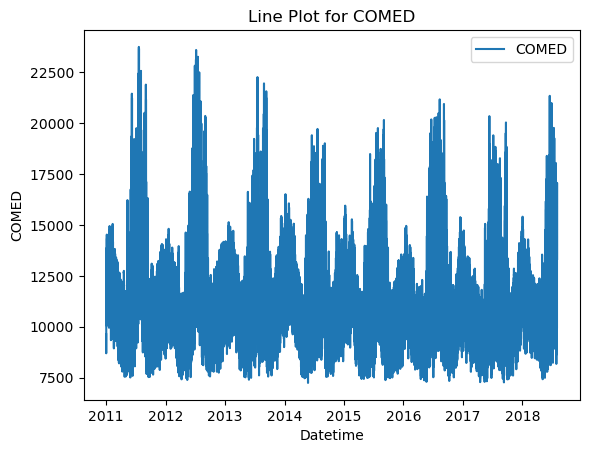

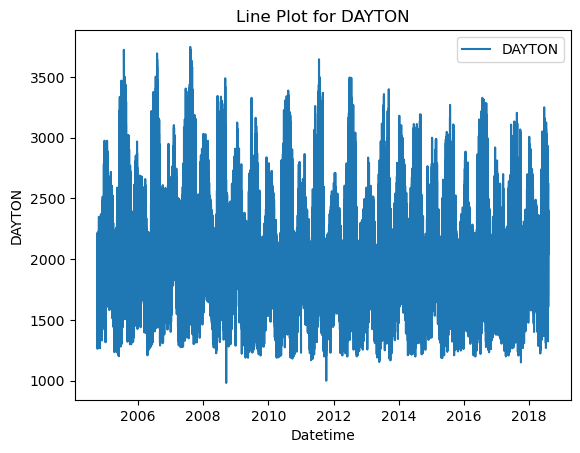

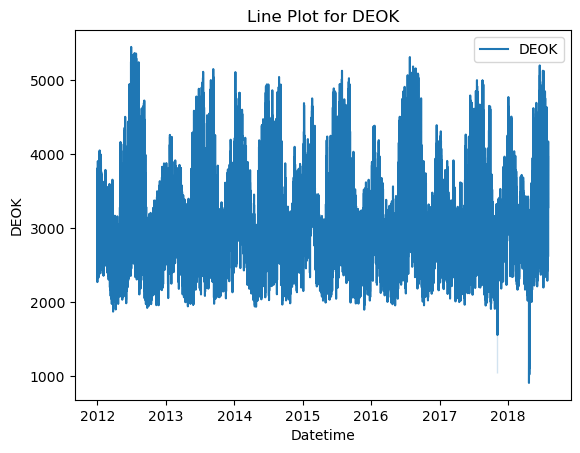

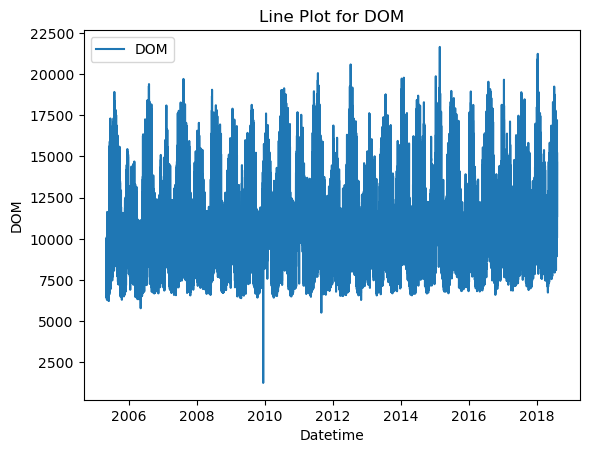

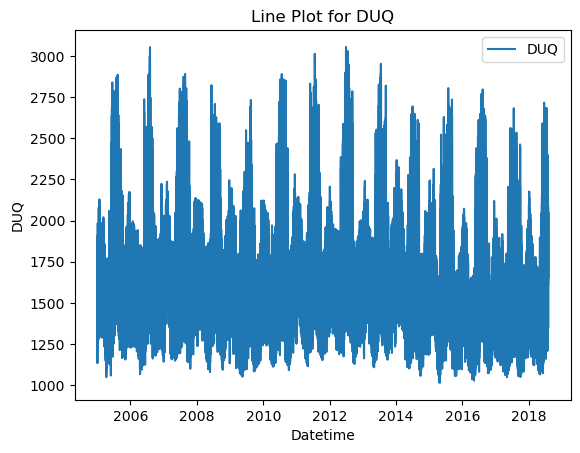

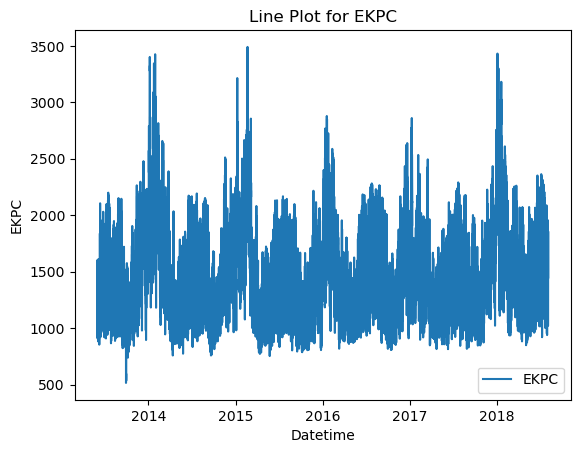

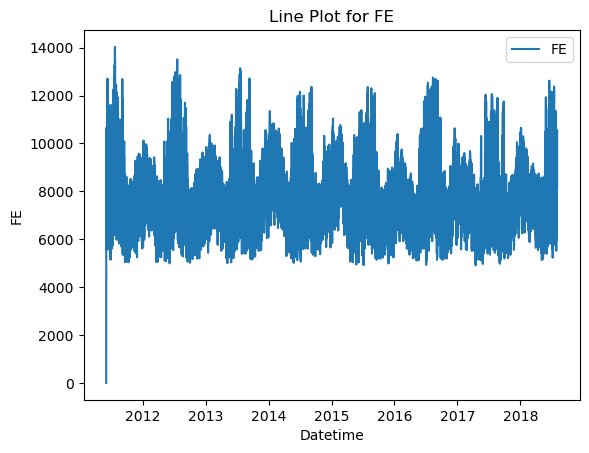

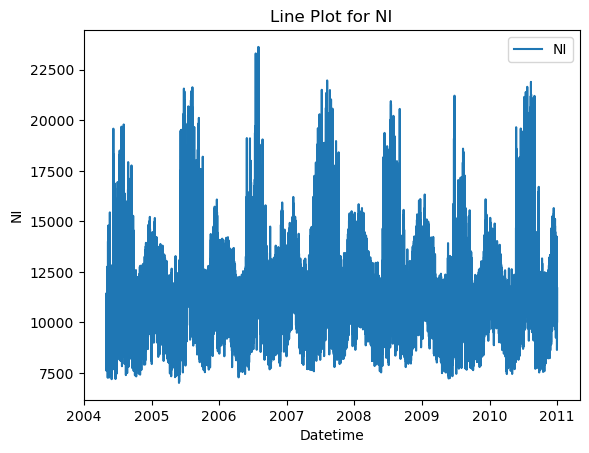

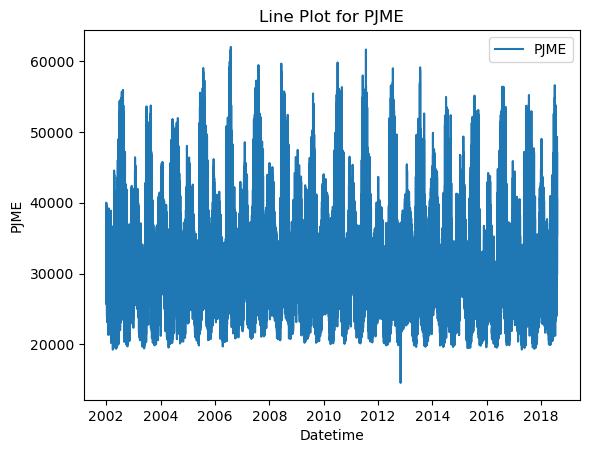

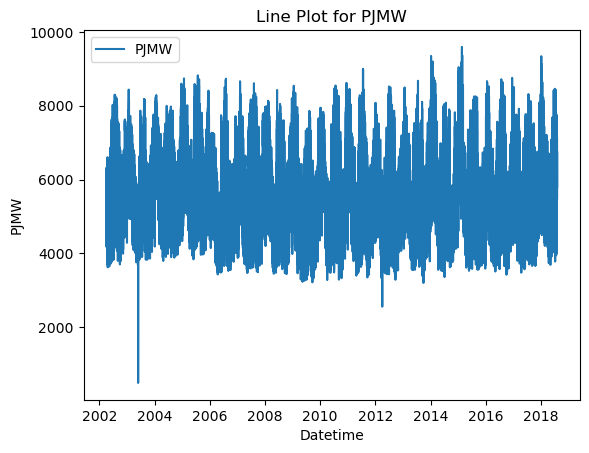

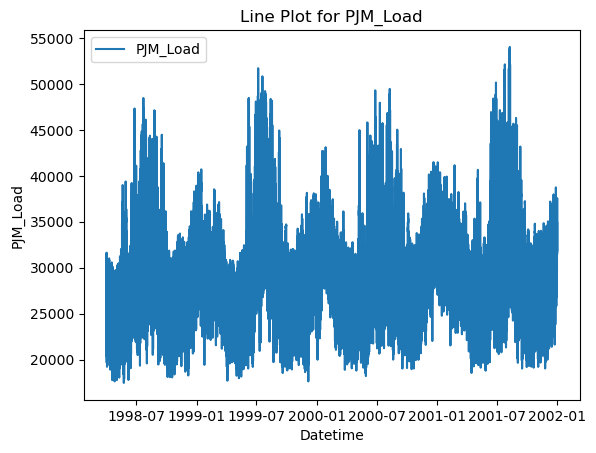

In [7]:
# Visualization for each column
column_list = list(df.columns)[1:13]

for column in column_list:
    plt.figure()
    sns.lineplot(x='Datetime', y=column, data=df, label=column)
    plt.title(f'Line Plot for {column}')
    plt.xlabel('Datetime')
    plt.ylabel(column)
    plt.legend()
    plt.show()

In [8]:
# df = df.set_index('Datetime')
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Datetime,178262,2008-06-01 15:46:51.203734016,1998-04-01 01:00:00,2003-05-02 09:15:00,2008-06-01 16:30:00,2013-07-03 00:45:00,2018-08-03 00:00:00,NaN
AEP,121273.0,15499.513717,9581.0,13630.0,15310.0,17200.0,25695.0,2591.399065
COMED,66497.0,11420.152112,7237.0,9780.0,11152.0,12510.0,23753.0,2304.139517
DAYTON,121275.0,2037.85114,982.0,1749.0,2009.0,2279.0,3746.0,393.403153
DEOK,57739.0,3105.096486,907.0,2687.0,3013.0,3449.0,5445.0,599.859026
DOM,116189.0,10949.203625,1253.0,9322.0,10501.0,12378.0,21651.0,2413.946569
DUQ,119068.0,1658.820296,1014.0,1444.0,1630.0,1819.0,3054.0,301.74064
EKPC,45334.0,1464.218423,514.0,1185.0,1386.0,1699.0,3490.0,378.868404
FE,62874.0,7792.159064,0.0,6807.0,7700.0,8556.0,14032.0,1331.268006
NI,58450.0,11701.682943,7003.0,9954.0,11521.0,12896.75,23631.0,2371.498701


In [9]:
print('The number of null values in each column:')
df.isnull().sum()

The number of null values in each column:


Datetime         0
AEP          56989
COMED       111765
DAYTON       56987
DEOK        120523
DOM          62073
DUQ          59194
EKPC        132928
FE          115388
NI          119812
PJME         32896
PJMW         35056
PJM_Load    145366
Week             0
Month            0
Quarter          0
Year             0
dtype: int64

In [10]:
print('The percentage of null values in each column:')
print((round(df.isnull().sum() / len(df) * 100, 2)).apply(lambda x: "{:.2f}%".format(x)))

The percentage of null values in each column:
Datetime     0.00%
AEP         31.97%
COMED       62.70%
DAYTON      31.97%
DEOK        67.61%
DOM         34.82%
DUQ         33.21%
EKPC        74.57%
FE          64.73%
NI          67.21%
PJME        18.45%
PJMW        19.67%
PJM_Load    81.55%
Week         0.00%
Month        0.00%
Quarter      0.00%
Year         0.00%
dtype: object


**Note:**<br>
* Since the PJME (PJM East Region) and PJMW (PJM West Region) datasets showed few occurrences of missing values, I plan to commence my analysis with PJME and subsequently assess PJMW.

## PJM East Region Analysis

In [11]:
# Load PJME dataset
pjme_df = pd.read_csv('./archive/PJME_hourly.csv')
pjme_df = pd.DataFrame(pjme_df)

# Change Datetime column
pjme_df['Datetime'] = pd.to_datetime(df['Datetime'])
pjme_df.head()

,Datetime,PJME_MW
0,1998-12-31 01:00:00,26498.0
1,1998-12-31 02:00:00,25147.0
2,1998-12-31 03:00:00,24574.0
3,1998-12-31 04:00:00,24393.0
4,1998-12-31 05:00:00,24860.0


In [12]:
# Drop null values (18.45% of the dataset)
pjme_df = pjme_df.dropna()
# Confirm all null values are dropped
pjme_df.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [13]:
# Add four columns - Week column had an error (Fixed)
pjme_df['Week'] = pjme_df['Datetime'].apply(lambda x: x.strftime('%Y-W%V'))
#pjme_df['Month'] = pjme_df['Datetime'].dt.strftime('%Y-%m')
pjme_df['Month'] = pjme_df['Datetime'].dt.strftime('%m')
pjme_df['Quarter'] = pjme_df['Datetime'].dt.to_period('Q').dt.strftime('%Y-Q%q')
pjme_df['Year'] = pjme_df['Datetime'].dt.strftime('%Y')
pjme_df.head()

,Datetime,PJME_MW,Week,Month,Quarter,Year
0,1998-12-31 01:00:00,26498.0,1998-W53,12,1998-Q4,1998
1,1998-12-31 02:00:00,25147.0,1998-W53,12,1998-Q4,1998
2,1998-12-31 03:00:00,24574.0,1998-W53,12,1998-Q4,1998
3,1998-12-31 04:00:00,24393.0,1998-W53,12,1998-Q4,1998
4,1998-12-31 05:00:00,24860.0,1998-W53,12,1998-Q4,1998


In [14]:
pjme_df.describe()

,Datetime,PJME_MW
count,145366,145366.000000
mean,2006-07-20 05:57:28.016730368,32080.222831
min,1998-04-01 01:00:00,14544.000000
25%,2002-05-24 15:15:00,27573.000000
50%,2006-07-17 04:30:00,31421.000000
75%,2010-09-08 17:45:00,35650.000000
max,2015-01-01 00:00:00,62009.000000
std,NaN,6464.012166


In [15]:
# Check top 10 Energy Consumption from 1998-2015
pjme_df.sort_values(by='PJME_MW', ascending=False).head(10)

,Datetime,PJME_MW,Week,Month,Quarter,Year
38695,2002-05-04 17:00:00,62009.0,2002-W18,05,2002-Q2,2002
38694,2002-05-04 16:00:00,61909.0,2002-W18,05,2002-Q2,2002
38671,2002-05-05 17:00:00,61796.0,2002-W18,05,2002-Q2,2002
38670,2002-05-05 16:00:00,61770.0,2002-W18,05,2002-Q2,2002
82770,2007-04-23 14:00:00,61646.0,2007-W17,04,2007-Q2,2007
38719,2002-05-03 17:00:00,61643.0,2002-W18,05,2002-Q2,2002
38693,2002-05-04 15:00:00,61641.0,2002-W18,05,2002-Q2,2002
38696,2002-05-04 18:00:00,61610.0,2002-W18,05,2002-Q2,2002
82771,2007-04-23 15:00:00,61608.0,2007-W17,04,2007-Q2,2007
82769,2007-04-23 13:00:00,61532.0,2007-W17,04,2007-Q2,2007


## Monthly Energy Consumption per Year

In [16]:
#Temporary change for Year column
year_df = pjme_df.copy()
year_df['Year'] = year_df['Year'].apply(int)

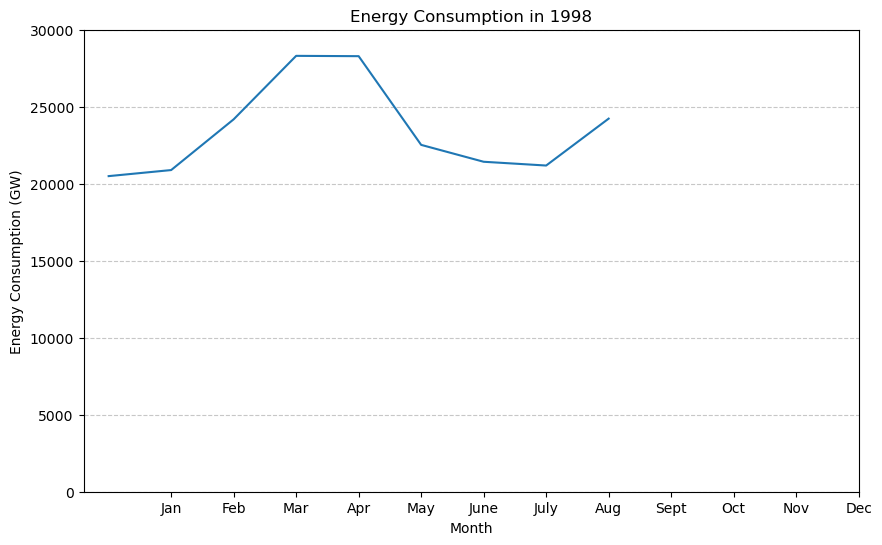

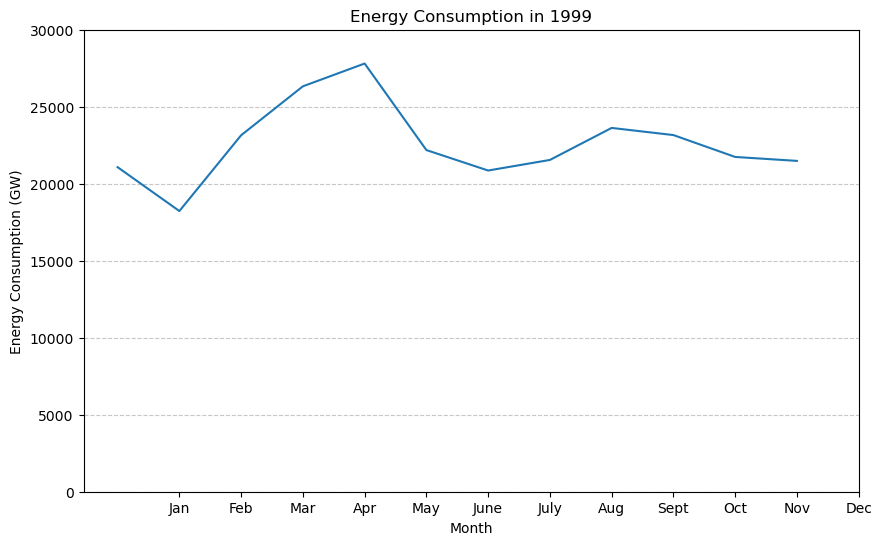

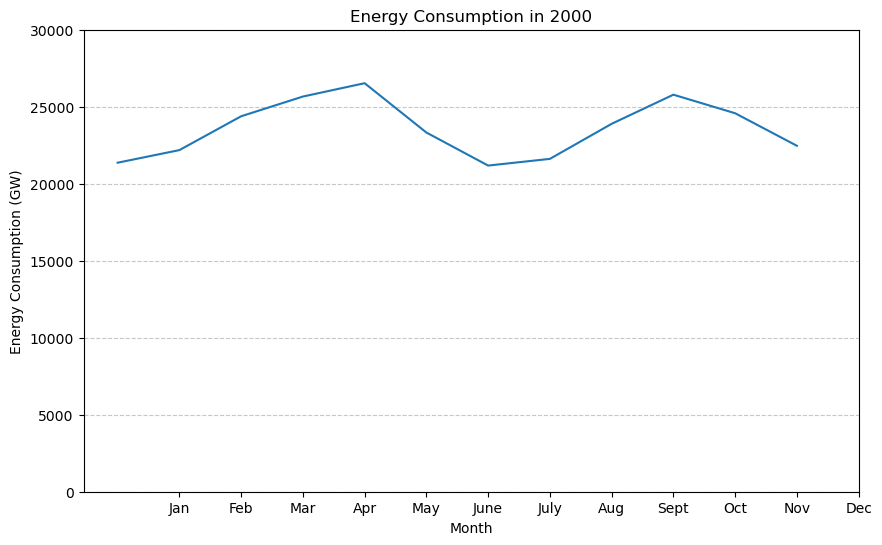

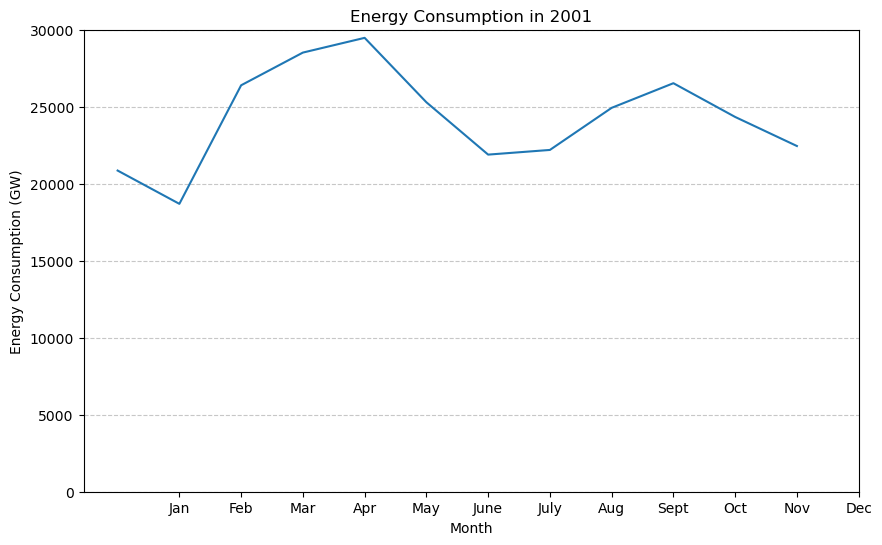

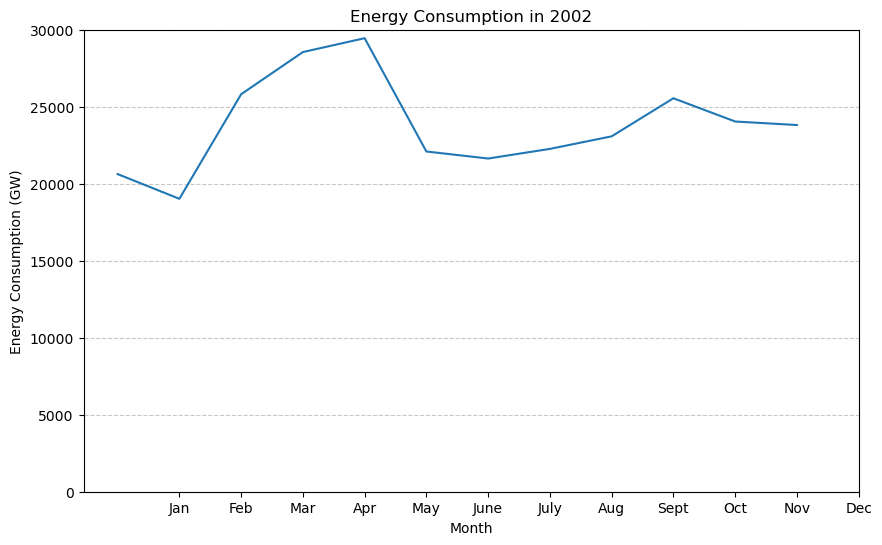

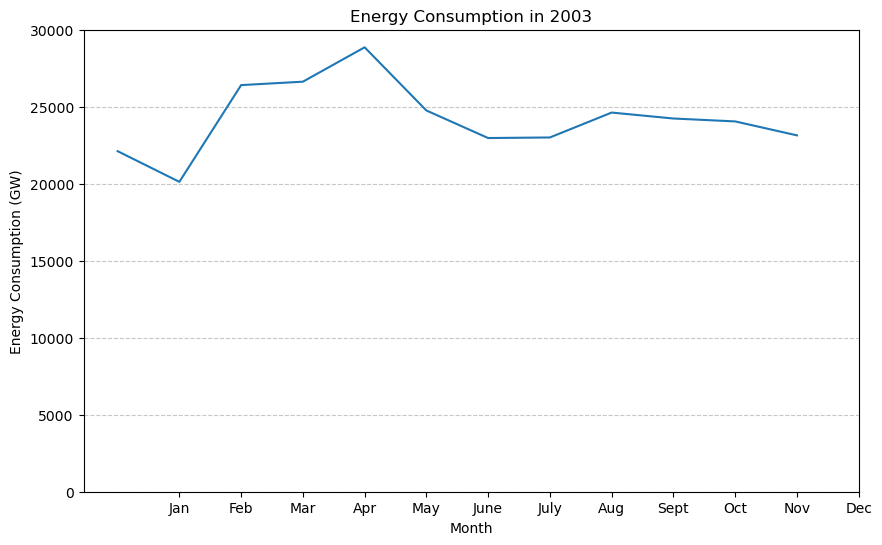

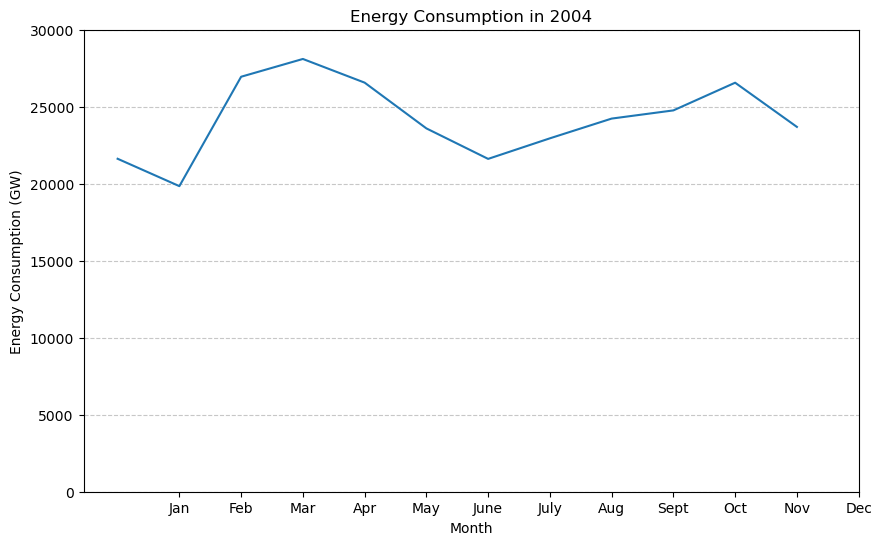

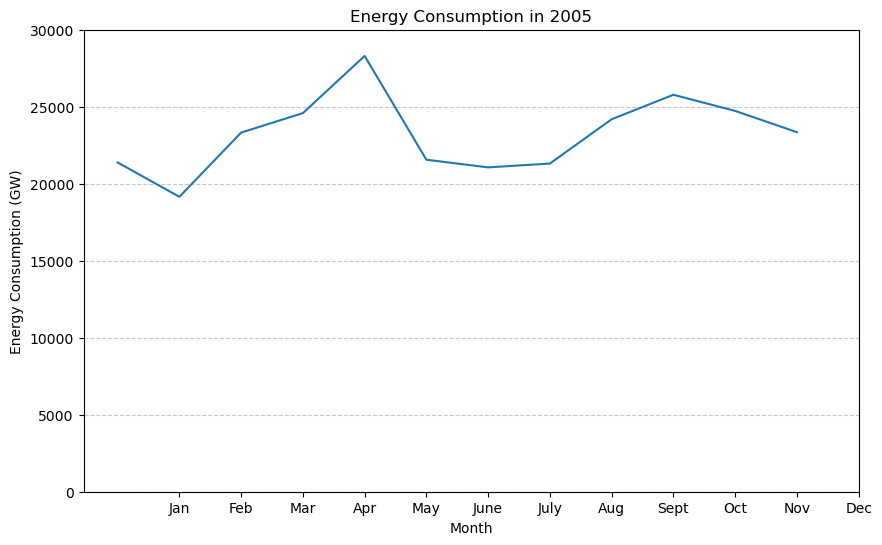

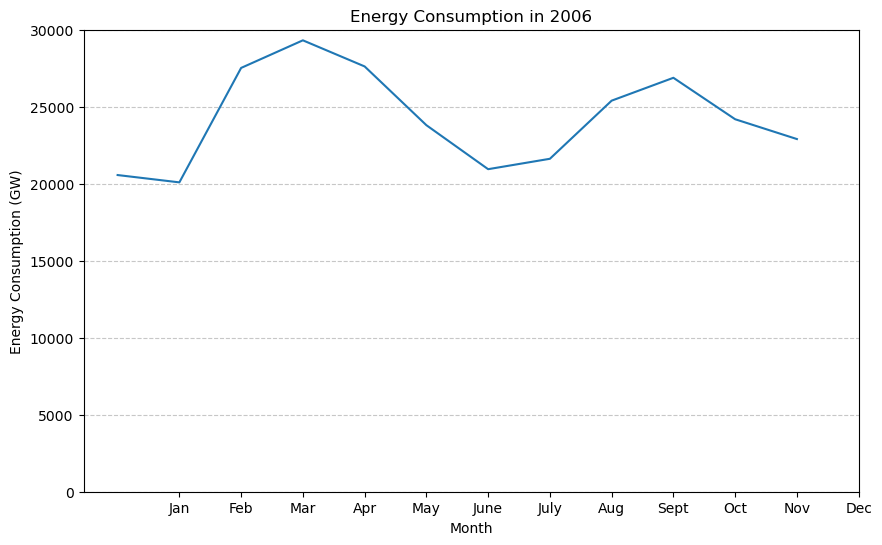

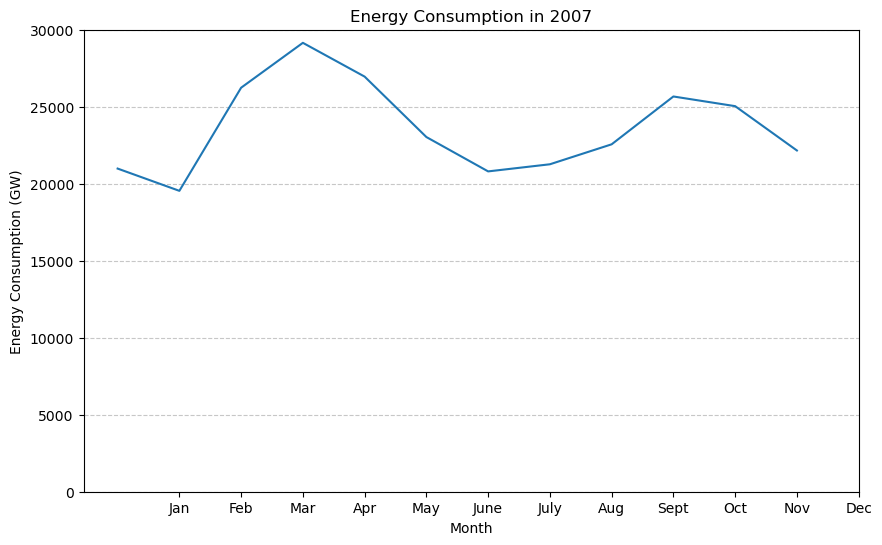

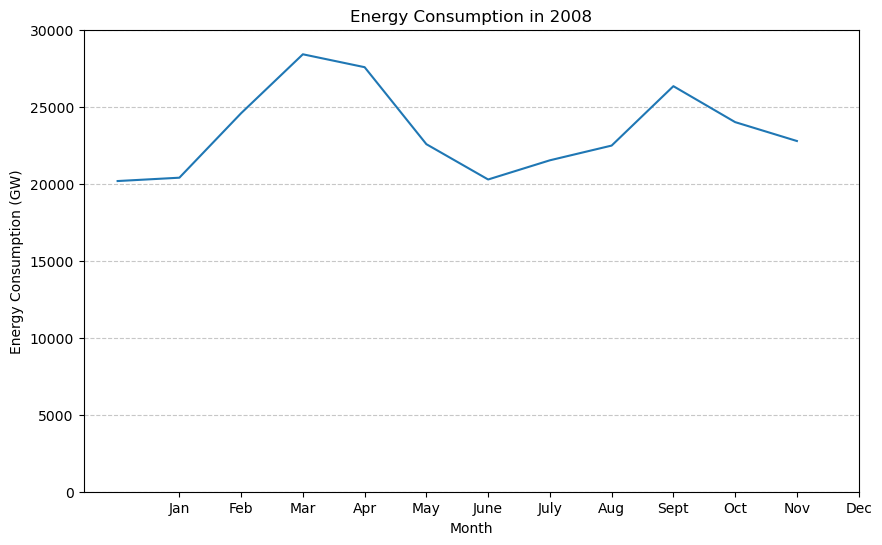

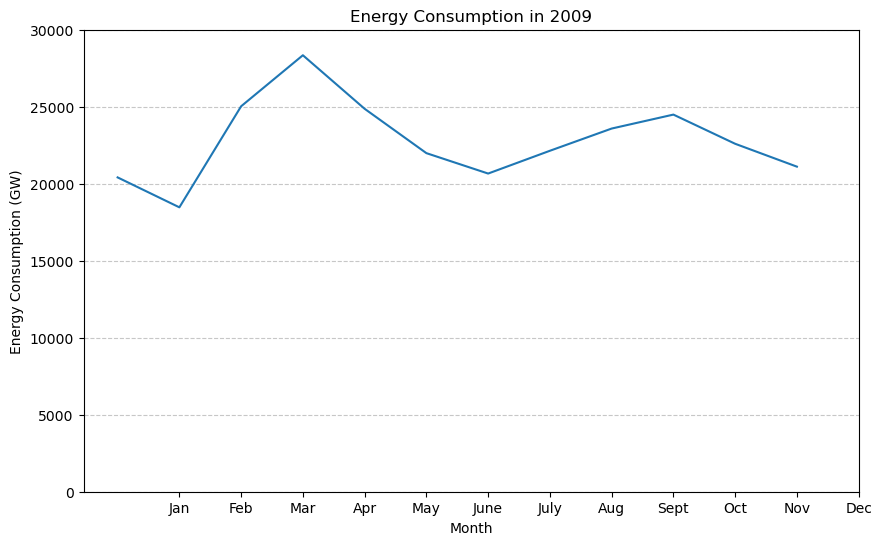

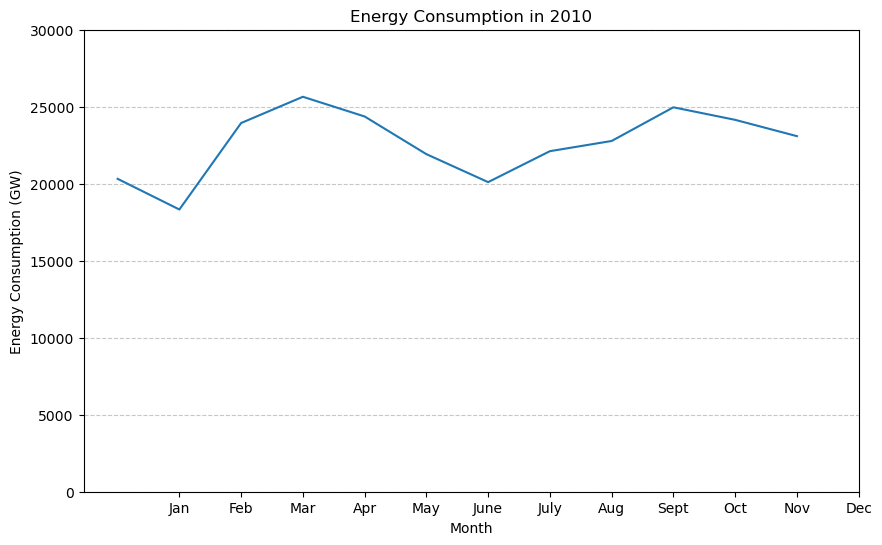

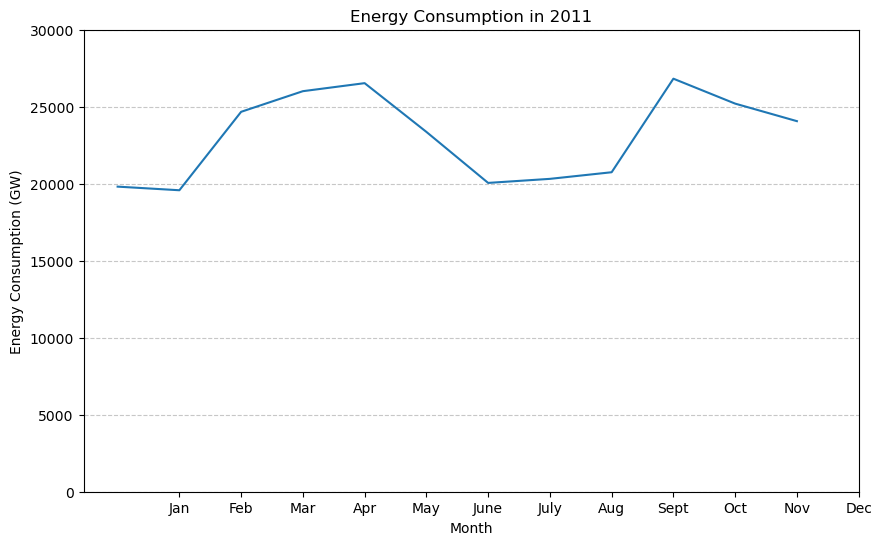

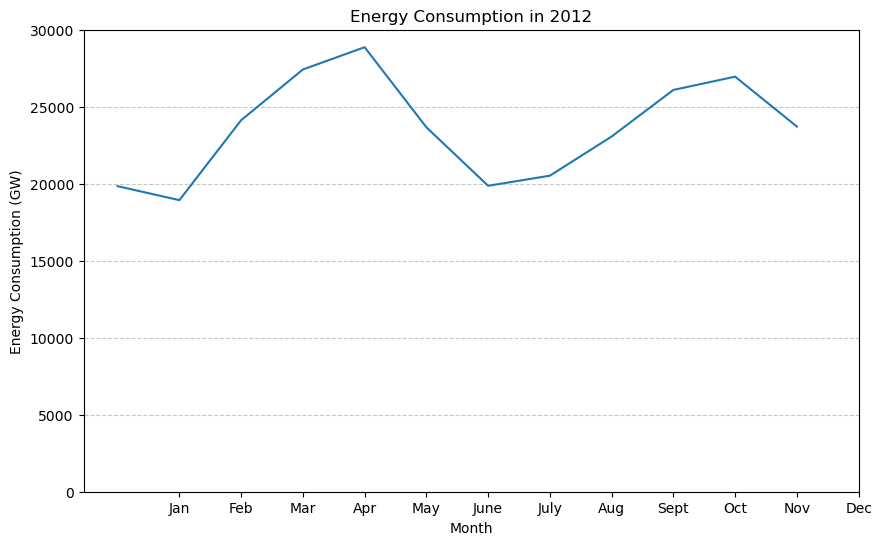

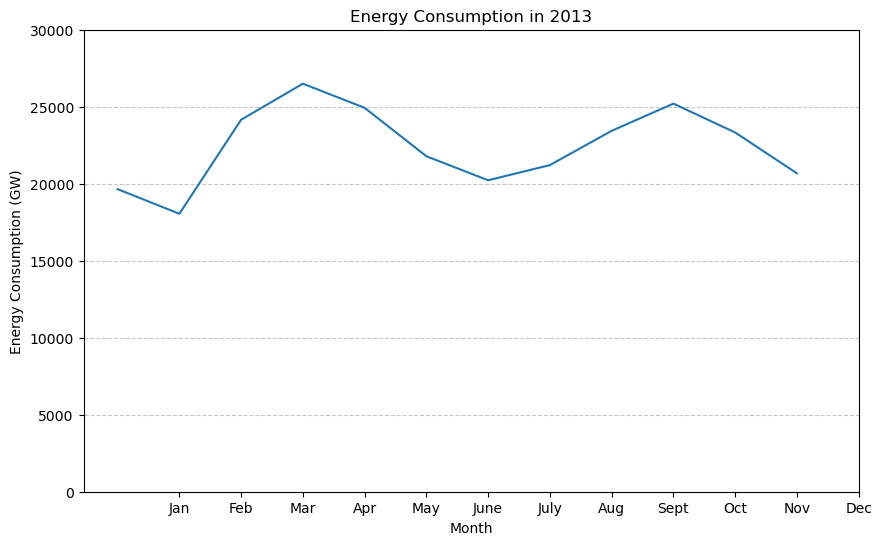

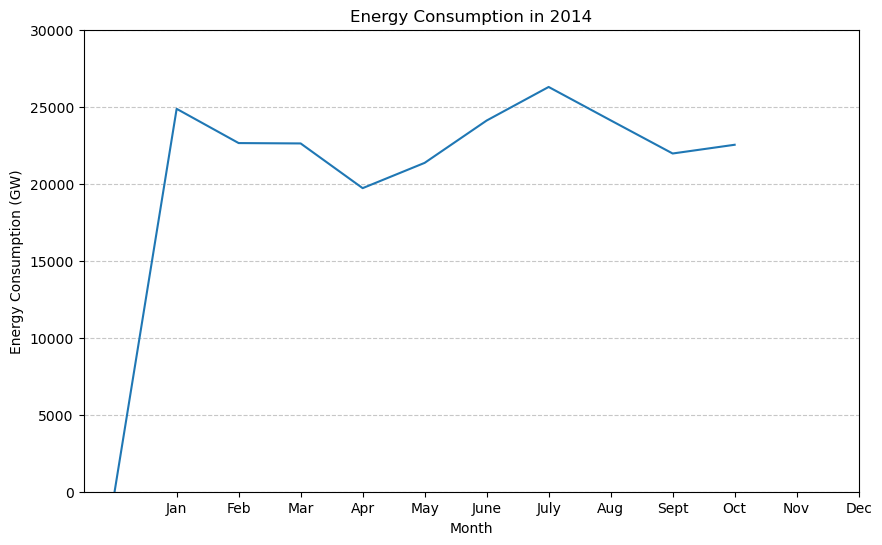

In [17]:
# Want to create a barplot for each year (1998-2014) and show monthly consumption usage.

min_year = int(year_df['Year'].min())
max_year = int(year_df['Year'].max())

for year in range(min_year, max_year):
    #Select data for the current year
    year_data = year_df[year_df['Year'] == year]
    
    #Group by each month
    monthly_consumption = year_data.groupby('Month')['PJME_MW'].sum()/1000
    
    #Barplot
    plt.figure(figsize=(10,6))
    plt.plot(monthly_consumption.index, monthly_consumption.values)
    plt.xlabel('Month')
    plt.ylabel('Energy Consumption (GW)')
    plt.title(f'Energy Consumption in {year}')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.ylim(0, 30000)
    plt.show()

In [18]:
# # Visualization for PJME from above
# sns.lineplot(x='Datetime', y='PJME_MW', data=pjme_df, label='Line Plot for PJME')

In [19]:
# Define the percentage of data to be used for training
train_per = 0.8

# Calculate the number of rows for training
train_size = int(len(pjme_df) * train_per)

# Split the DataFrame into training and testing sets
train_df = pjme_df.iloc[:train_size]
test_df = pjme_df.iloc[train_size:]

# Optionally, you can reset the index if needed
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

In [20]:
train_df.describe()

,Datetime,PJME_MW
count,116292,116292.000000
mean,2004-11-25 04:58:56.384274304,32195.250748
min,1998-04-01 01:00:00,14544.000000
25%,2001-07-25 16:45:00,27700.750000
50%,2004-11-18 08:30:00,31604.000000
75%,2008-03-14 00:15:00,35688.000000
max,2012-01-01 00:00:00,62009.000000
std,NaN,6442.686520


In [21]:
test_df.describe()

,Datetime,PJME_MW
count,29074,29074.000000
mean,2013-02-21 07:52:18.144046336,31620.126986
min,2011-01-01 01:00:00,19255.000000
25%,2012-05-06 15:15:00,27099.000000
50%,2013-03-05 12:30:00,30501.500000
75%,2014-03-04 03:45:00,35436.500000
max,2015-01-01 00:00:00,56609.000000
std,NaN,6528.494054
